In [11]:
#skit
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# X = np.genfromtxt('data/X_train.txt', delimiter=',')
# Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X_data = pd.read_csv('data/X_train.txt')
Y_data = pd.read_csv('data/Y_train.txt')

# #apply SelectKBest class to extract top 10 best features
X = X_data.iloc[:,41:]
Y = Y_data.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k="all" )
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfscores],axis=1)

featureScores.columns = ['Score']  #naming the dataframe columns
df = featureScores.nlargest(2,'Score')
print("Non-negative features ordered by Score: ")
top_features = []
for index, row in df.iterrows():
    top_features.append(index+41)
    print(index+41, row['Score'])


Non-negative features ordered by Score: 
62 6427.279217431667
58 2664.0309597484893


0.10939464702712412
0.2701634632656727
0.3195617028920424
0.3827914496137956
0.44368600682593856
0.4632656727142087
0.47045087120531703
Training and validation error as a function of K:


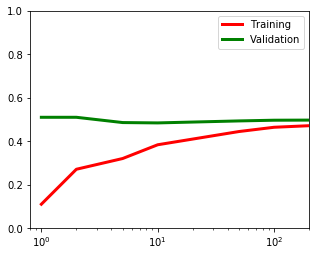

In [12]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt 

# np.random.seed(0)
# nych=np.genfromtxt("data/nyc_housing.txt",delimiter=None)

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
Xa = []
for a in top_features:
    Xa.append(X[:,a])


X,Y=ml.shuffleData(X,Y)
Xtr,Xva,Ytr,Yva=ml.splitData(X,Y,.75)
# Xtra,Xva,Ytra,Yva=ml.splitData(Xa,Y,.75)
Xtra = []
Xvaa = []
for a in top_features:
    Xtra.append(Xtr[:,a])
    Xvaa.append(Xva[:,a])

    
Xtra = np.asarray(Xtra).T
Xvaa = np.asarray(Xvaa).T
# print(np.asarray(Xtra).T.shape)
# print(len(Xtra))

knn = ml.knn.knnClassify(Xtra,Ytr)
k_values = [1,2,5,10,50,100,200]


fig,ax=plt.subplots(1,1,figsize=(5,4))

errTr=np.zeros(len(k_values))
errVa=np.zeros(errTr.shape[0])
# print(Xtra)
for i,k in enumerate(k_values):
    
    knn.train(Xtra,Ytr,K=k)
    YvaHat = knn.predict(Xvaa)
#     print(k, YvaHat, len(YvaHat))


    errTr[i]=knn.err(Xtra,Ytr)
    errVa[i]=knn.err(Xvaa,Yva)
    print(knn.err(Xtra,Ytr))
    
ax.semilogx(k_values,errTr,'r-',lw=3,label='Training')
ax.semilogx(k_values,errVa,'g-',lw=3,label='Validation')
ax.legend()
ax.set_xlim(.8,200)
ax.set_ylim(0,1)
print("Training and validation error as a function of K:")
plt.show()



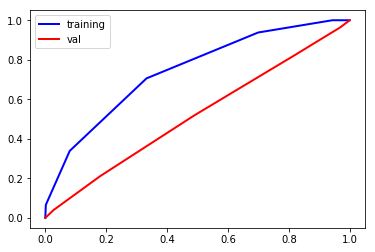

AUC training Area: 0.7505
AUC val Area: 0.5159
(7422, 4)
(7422, 2)


In [10]:
learner = ml.knn.knnClassify(Xtra,Ytr) # train a model using training data X,Y
learner.train(Xtra,Ytr,K=50)
fpr, tpr, tnr = learner.roc(Xtra, Ytr) #apply ROC on training data
fpr2, tpr2, tnr2 = learner.roc(Xvaa, Yva) #apply ROC on validation data
plt.plot(fpr, tpr, 'b-', label = "training", linewidth = 2) #plot training 
plt.plot(fpr2, tpr2, 'r-', label = "val", linewidth = 2) #plot validation
plt.legend(fontsize=10, loc=0)
plt.show()


print('AUC training Area: %0.4f' %(learner.auc(Xtra, Ytr)))
print('AUC val Area: %0.4f' %(learner.auc(Xvaa, Yva)))



    
# Xtra = np.asarray(Xtra).T
# Xvaa = np.asarray(Xvaa).T
Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Xtea = []

for a in top_features:
    Xtea.append(Xte[:,a])
Xtea = np.asarray(Xtea).T

# print(Xtea.shape)

Yte =np.vstack((np.arange(Xtea.shape[0]), learner.predict(Xtea))).T
# print(Yte.shape)
# Output a file with two columns, a row ID and a confidence in class 1: 

np.savetxt('Y_project_submit.txt',Yte,'%d, %.2f',header='Id,Predicted',comments='',delimiter=',')


In [96]:
a = np.asarray([[1,2,4],[1,2,3]])
print(a.shape)

print(Yte)

(2, 3)
[1. 1. 0. ... 0. 1. 0.]
